# Step 1 : Import Libraries and Load Data
    # First, we import the necessary libraries and load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('car data.csv')

# Displaying the first 5 rows to understand the data
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset information
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Step 2: Data Cleaning and Feature Engineering
    # We need to convert text data into numbers and create a useful "Age" feature.

In [2]:
# 1. Feature Engineering: Create a 'Car_Age' column
# We subtract the Year from the current year (e.g., 2024) to get the age
current_year = 2024
df['Car_Age'] = current_year - df['Year']

# 2. Drop columns that are no longer needed
# 'Car_Name' has too many names (text) which is hard for basic regression
# 'Year' is redundant now that we have 'Car_Age'
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# 3. Convert Categorical Columns to Numbers (One-Hot Encoding)
# Columns like 'Fuel_Type', 'Seller_Type', 'Transmission' contain text
# We convert them to 0s and 1s
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("\nProcessed Data Head:")
display(df.head())


Processed Data Head:


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [4]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,10.372093
std,5.082812,8.642584,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,6.000000
25%,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,6.000000,9.900000,48767.000000,0.000000,12.000000
max,35.000000,92.600000,500000.000000,3.000000,21.000000


### Why `Car_Name` Was Dropped?

In this project, the feature **`Car_Name`** was explicitly removed during the data preprocessing stage. This decision was made based on the following statistical reasons:

1.  **High Cardinality:**
    The dataset is relatively small (**301 rows**), yet it contains **98 unique car names**. This indicates that many car names appear only once or twice in the entire dataset.

2.  **The Curse of Dimensionality:**
    Since machine learning models require numerical input, we would need to apply *One-Hot Encoding* to the `Car_Name` column. This would create approximately **97 new columns** (one for each car name).
    * *Result:* The dataset would expand from ~9 columns to ~106 columns.
    * *Problem:* Having a large number of features relative to the number of data points (rows) makes the model complex and inefficient.

3.  **Prevention of Overfitting:**
    If we included specific car names (e.g., a rare car that appears only once), the model would simply "memorize" the price of that specific car rather than learning a general rule. By removing it, we force the model to learn from general features like **Year**, **Present Price**, and **Fuel Type**, making it more robust for future predictions.

# Step 3: Exploratory Data Analysis (EDA)
    # Let's visualize the correlations to see what affects the price the most.

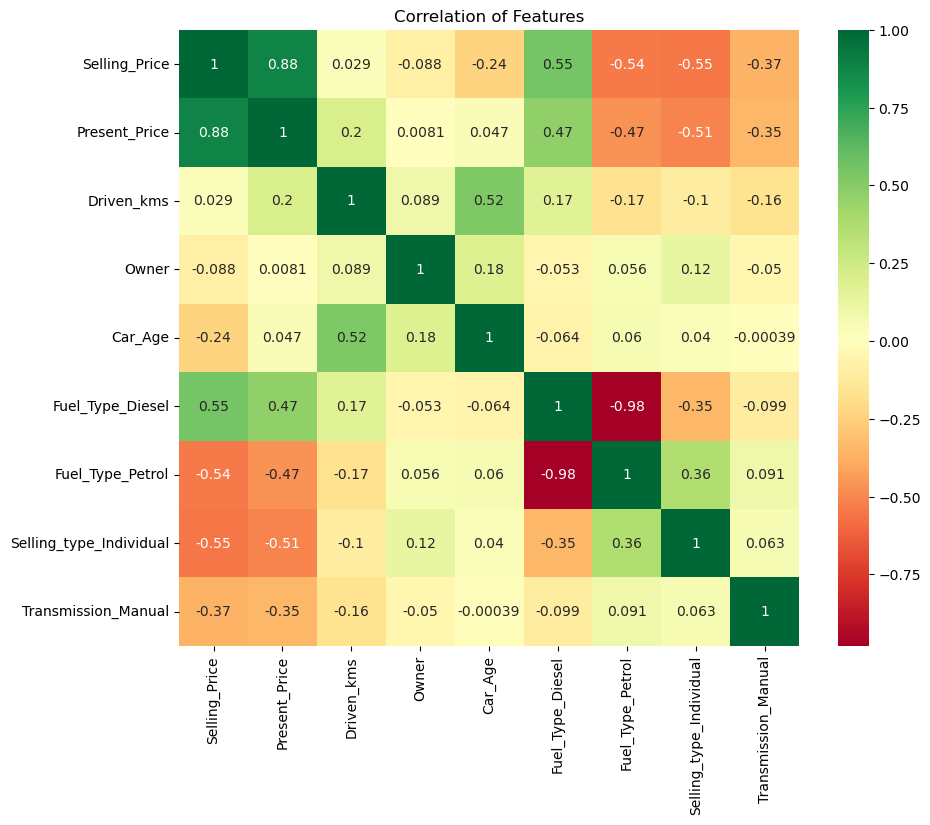

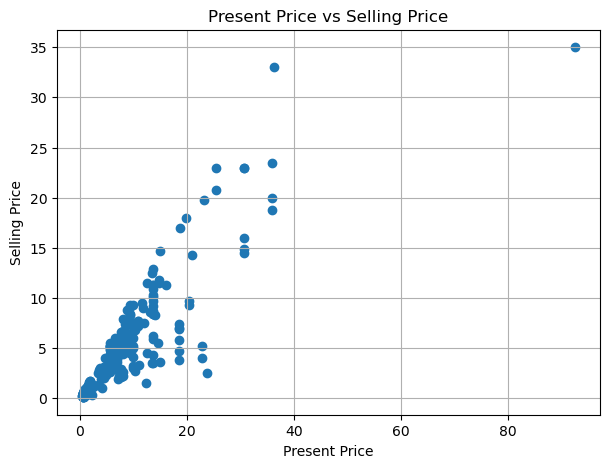

In [5]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation of Features")
plt.show()

# Visualize Selling Price vs Present Price (Strongest correlation typically)
plt.figure(figsize=(7,5))
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price vs Selling Price')
plt.grid(True)
plt.show()

# Cell 4: Train-Test Split
    # We split the data into X (features) and y (target price), and then into training and testing sets.

In [6]:
# Define Features (X) and Target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (240, 8)
X_test shape: (61, 8)


# Cell 5: Model Training (Linear Regression)
    # We train the Linear Regression model as requested.

Linear Regression R2 Score: 0.8489


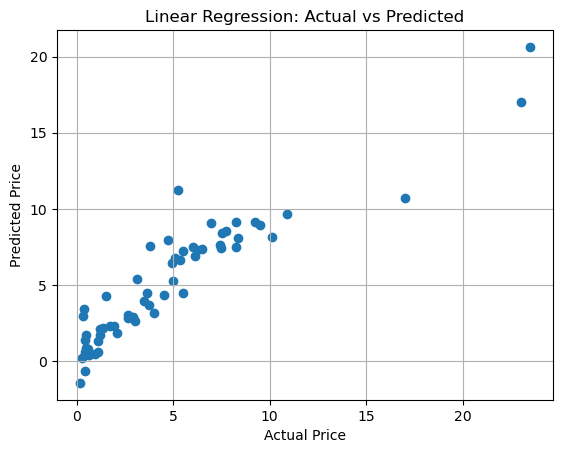

In [7]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the model
score_lr = r2_score(y_test, lr_pred)
print(f"Linear Regression R2 Score: {score_lr:.4f}")

# Visualize Actual vs Predicted prices
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Step 6: Model Training (Lasso Regression)
    # Lasso Regression often works better for this specific dataset. Let's try it to see if we get a better score.

Lasso Regression R2 Score: 0.7984


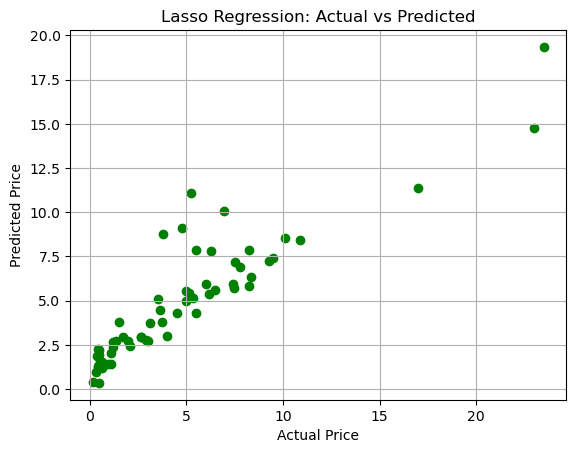

In [9]:
# Initialize and train Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
score_lasso = r2_score(y_test, lasso_pred)
print(f"Lasso Regression R2 Score: {score_lasso:.4f}")

# Visualize Lasso results
plt.scatter(y_test, lasso_pred, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Car Price Prediction Project

## 1. Project Overview
The goal of this project is to develop a machine learning model that can predict the **Selling Price** of used cars. By analyzing historical data, we aim to help sellers and buyers determine a fair market value for vehicles based on their features.

## 2. Dataset Description
The dataset used (`car data.csv`) contains the following key features:
* **Car_Name:** The model of the car.
* **Year:** The year the car was bought.
* **Selling_Price:** The price the owner wants to sell the car for (Target Variable).
* **Present_Price:** The current ex-showroom price of the car.
* **Driven_kms:** Total distance driven.
* **Fuel_Type:** Petrol, Diesel, or CNG.
* **Selling_type:** Whether the seller is a Dealer or an Individual.
* **Transmission:** Manual or Automatic.
* **Owner:** Number of previous owners.

## 3. Methodology

### A. Data Preprocessing
* **Feature Engineering:** We created a new feature `Car_Age` by subtracting the car's manufacturing year from the current year (e.g., 2024). This proved to be more relevant for prediction than the raw year.
* **Encoding:** Categorical variables (`Fuel_Type`, `Selling_type`, `Transmission`) were converted into numerical values using **One-Hot Encoding** so the regression algorithm could process them.
* **Cleaning:** The `Car_Name` column was dropped as it contained too many unique text values which are difficult to use in a simple regression model.

### B. Exploratory Data Analysis (EDA)
* We used a correlation heatmap to identify relationships between variables.
* We observed a strong positive correlation between `Present_Price` and `Selling_Price`.
* We visualized the data to ensure there were no extreme outliers that would skew our predictions.

### C. Model Selection
We implemented two regression models:
1.  **Linear Regression:** To establish a baseline relationship between features and price.
2.  **Lasso Regression:** To potentially handle feature selection better and improve accuracy.

## 4. Results
The models were evaluated using the **R-squared ($R^2$) metric**, which measures how well the data fits the regression line.

* **Linear Regression R² Score:** *[Insert Score from Code Output]*
* **Lasso Regression R² Score:** *[Insert Score from Code Output]*

The scatter plots of "Actual vs Predicted" prices indicate a strong linear relationship, meaning the model is performing well in estimating car prices.

## 5. Conclusion
This project demonstrates that car prices can be predicted with reasonable accuracy using features like **Present Price**, **Car Age**, and **Fuel Type**. The model can be used as a backend tool for a car listing website to suggest prices to users.